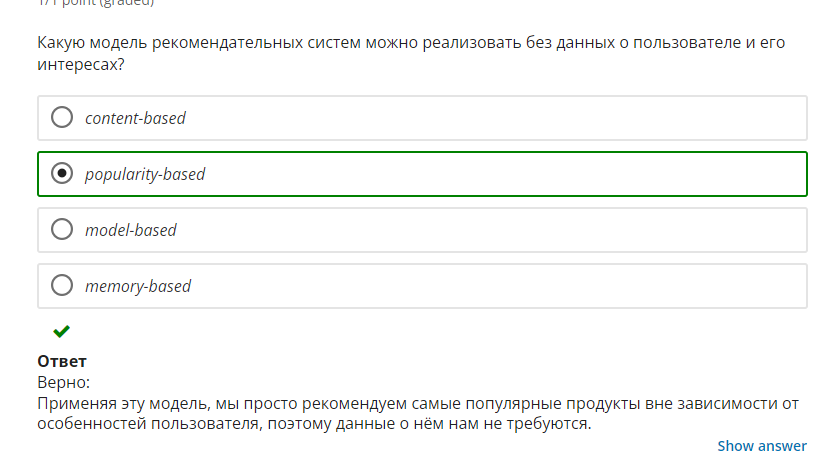

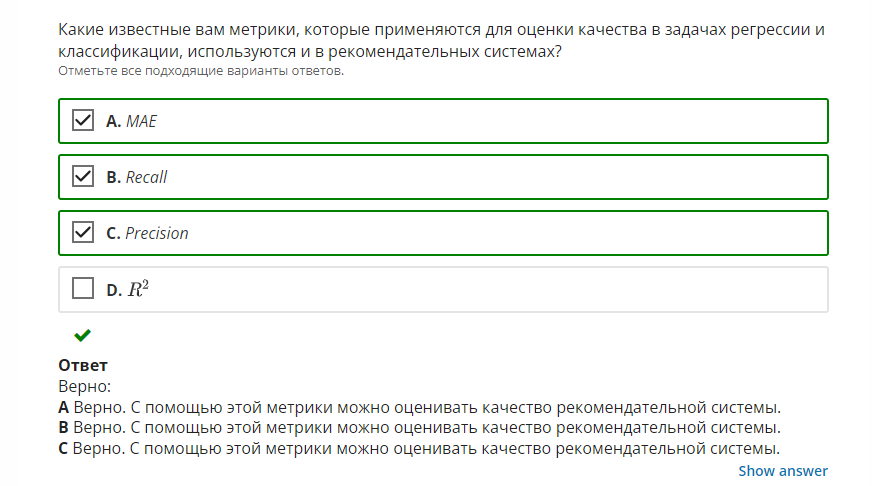

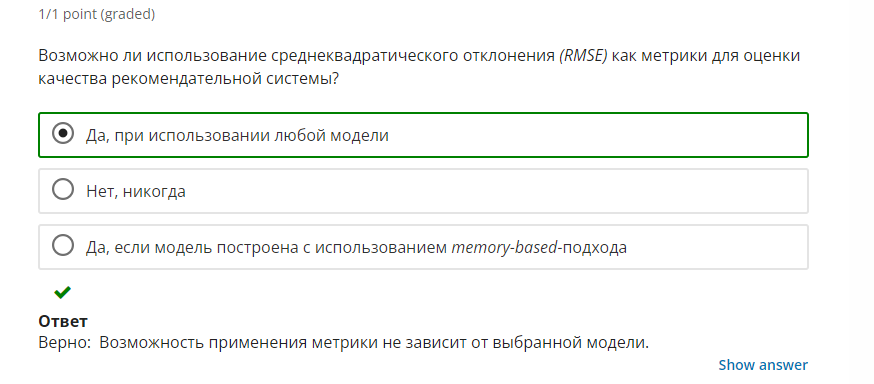

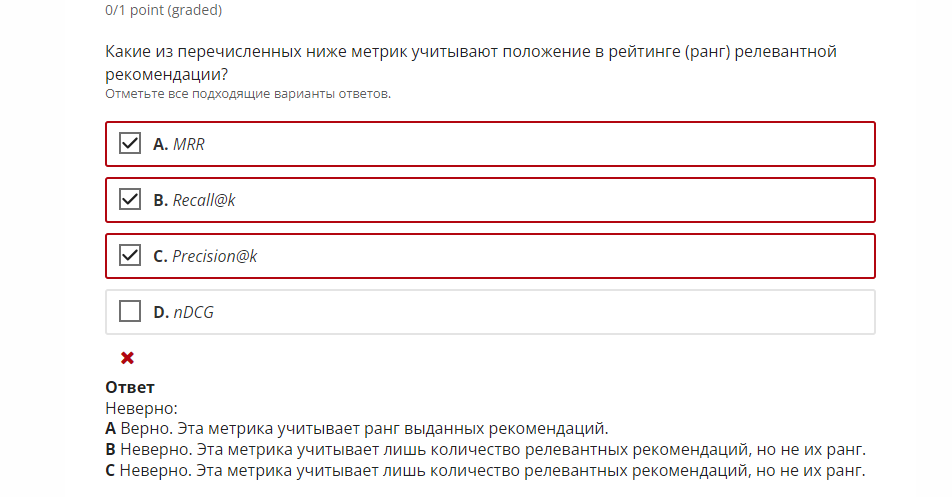

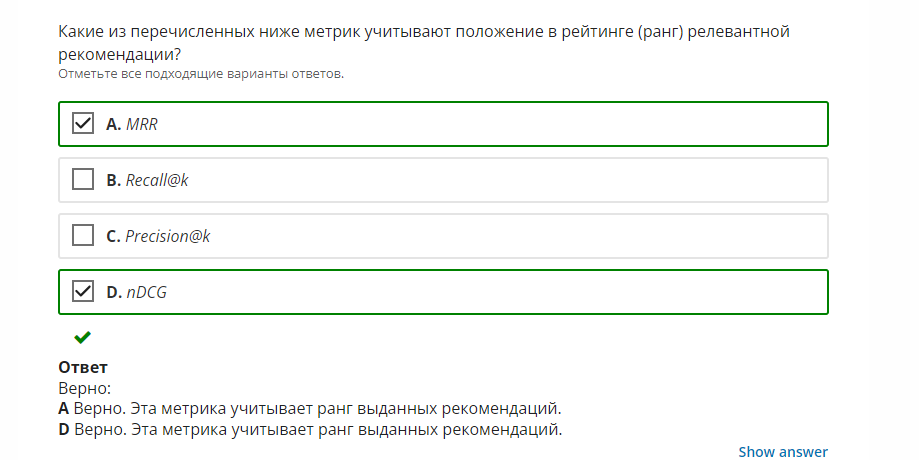

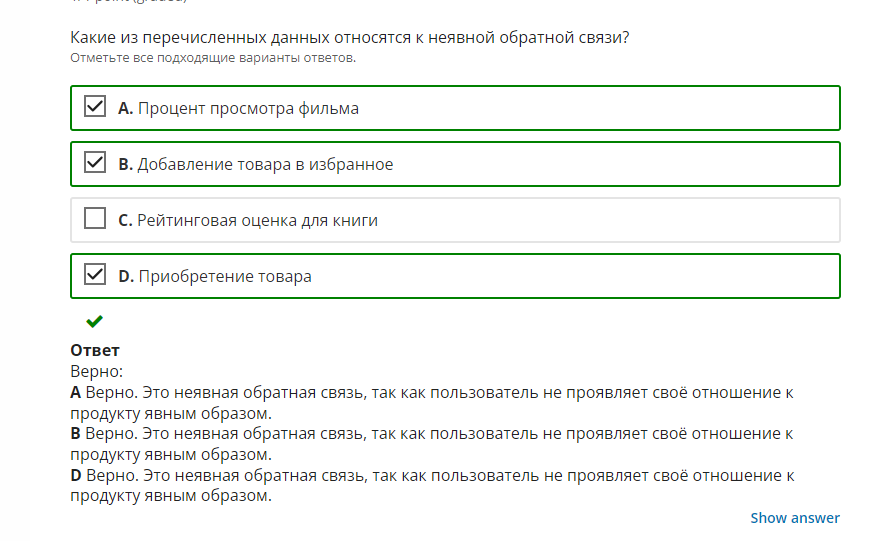

Разобрать принципы работы моделей рекомендательных систем:
content-based-модели;

коллаборативной фильтрации;

гибридной модели;

Познакомиться с основами применения глубокого обучения для построения рекомендательных систем.
Отработать изученные алгоритмы при решении практических задач.
В юните «Практика» мы достроим модель рекомендательной системы для статей, а в промежуточных юнитах рассмотрим применение методов построения рекомендательных систем на других датасетах из различных областей.

В этом юните мы рассмотрим систему рекомендаций на основе контента, или, как её чаще называют, content-based model.

Подход content-based предполагает, что пользователю рекомендуются товары или контент на основе его предпочтений и вкусов.

Профиль интересов пользователя формируется исходя из его оценок, а также неявной обратной связи: лайков, количества просмотров и так далее. В качестве рекомендаций пользователю предлагаются похожие элементы.

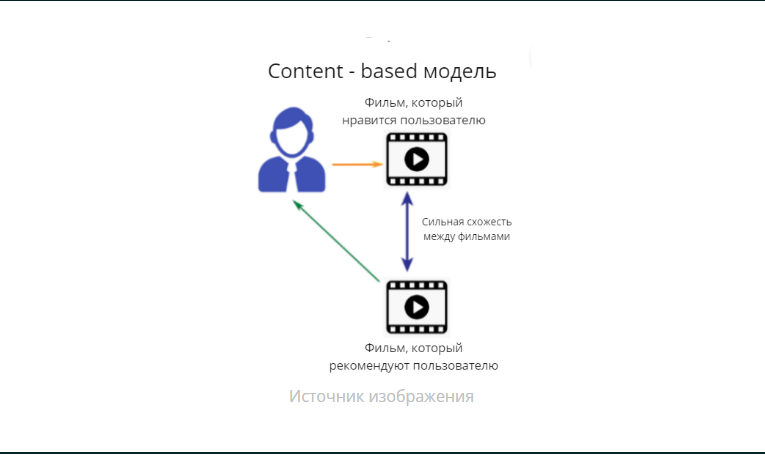

Вы наверняка уже сталкивались с content-based-рекомендациями в тех или иных сервисах. Например, на сайте Netflix можно использовать фильтрацию по контенту, чтобы создавать рекомендации из аналогичных элементов, которые размещаются в разделе More Like This.

Давайте на примере рассмотрим построение рекомендательной системы на основе контента для конкретного пользователя.

Допустим, пользователь Михаил поставил лайки и дизлайки фильмам на одном из веб-сервисов:


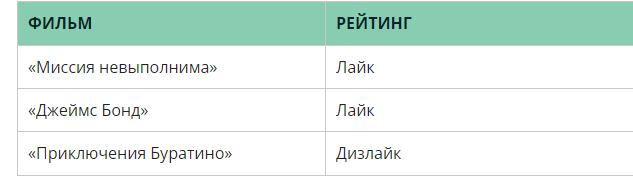

Предположим, что по правилам сервиса лайк прибавляет 4.5 балла к фильмам с таким жанром, а дизлайк вычитает 6 баллов. Теперь создадим вектор пользователя для Михаила на основе трёх его оценок:

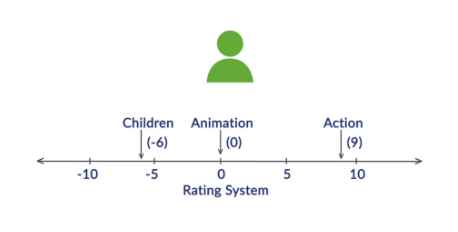

Присваиваем значение 9 боевикам, так как Михаил поставил лайк двум фильмам с жанром «Боевик». Михаил не смотрел анимационные фильмы, так что присваиваем 0 анимации, и, поскольку он оставил плохой отзыв фильму в жанре «Дети», присваиваем -6 детским фильмам.

Таким образом, вектор пользователя для Михаила — это(9,0,-6)  для шкал (Боевик, Анимация, Дети).

Теперь попробуем предсказать отношение Михаила к фильмам, которые он ещё не смотрел, например «Звёздные войны» и «История игрушек».

«Звёздные войны» — это боевик, который не относится к анимации или детским фильмам, поэтому по шкалам (Боевик, Анимация, Дети) у этого фильма будут координаты(1,0,0) . У фильма «История игрушек» будут координаты (0,1,1), так как он относится и к жанру детских фильмов, и к анимации.
Теперь нам необходимо найти произведения вектора пользователя и вектора фильма: чем больше будет скалярное произведение, тем более подходящим для Михаила будет фильм.

Скалярное произведение для «Истории игрушек» равно (-6) , а для «Звёздных войн» —9 . Следовательно, из этих двух вариантов именно «Звёздные войны» будут рекомендованы Михаилу, что вполне логично, ведь ему больше нравятся боевики.
Аналогично можно вычислить скалярные произведения векторов для всех фильмов на сайте и рекомендовать Михаилу десять наиболее подходящих фильмов.

В этом примере мы опирались лишь на схожесть фильмов по жанрам: скалярное произведение будет увеличиваться в том случае, если у фильма ненулевая координата для того жанра, который пользователь уже оценил положительно. Однако в реальности всё намного сложнее, ведь мы можем использовать одновременно жанр фильма, теги, описание, актёров и т. д. Для этого случая нам нужен способ измерить сходство между набором параметров.
Рассмотрим два наиболее популярных метода измерения такого сходства:

индекс Жаккара;
косинусная близость.

ИНДЕКС ЖАККАРА

Индекс Жаккара измеряет сходство между двумя наборами A и B как мощность множества пересечения, делённую на мощность множества объединения каких-то характеристик объекта. Его удобно применять для категориальных признаков.

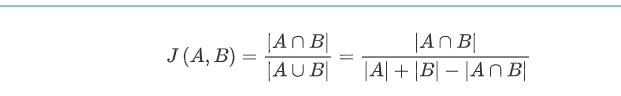

Например, с помощью индекса Жаккара мы можем оценить, насколько похожи фильмы, основываясь на наборах ключевых слов (тегов) для них:

фильм А : {фантастика, школа, романтика};

фильм B : {приключения, фантастика, школа};

фильм C : {ужасы, триллер, драма}.

Мы можем предположить, что фильм A больше похож на фильм B, чем на фильм C, так как фильмы A и B имеют два общих тега (фантастика, школа), в то время как фильмы A и C не имеют ни одного общего тега.

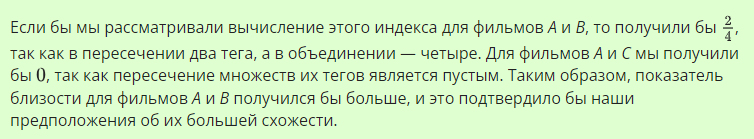

КОСИНУСНАЯ БЛИЗОСТЬ

Подход с использованием индекса Жаккара помог нам создать интуитивное представление о том, что означает сходство набора категориальных значений. Подход с косинусным сходством немного сложнее и применяется для оценки близости массивов с числами. Он требует, чтобы мы представляли объекты в виде вектора.
Например, мы можем представить те же самые фильмы как набор из трёх вещественных чисел

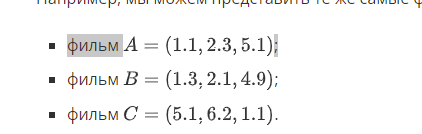

Глядя на эти векторы, кажется, что фильмы А и В похожи друг на друга больше, чем, например, фильмы А и С, так как координаты фильмов А и В очень близки и различаются гораздо меньше, чем координаты фильмов А и С.
Чтобы вычислить косинусную близость, нам понадобится следующая формула:



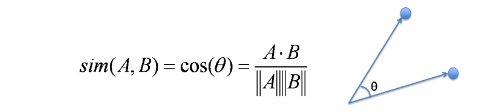

Как нам известно, чем выше значение косинусной близости, тем больше сходство между векторами. Таким образом, наши изначальные предположения совпали с реальностью: векторы А и В действительно похожи друг на друга сильнее, чем векторы А и С. Значит, если человек поставил высокую оценку фильму А, то мы должны порекомендовать ему фильм В

Итак, чтобы построить рекомендательную систему на основе контента, необходимо:

1) для каждого продукта создать характеризующие его признаки;

2) найти показатель близости между всеми продуктами;

3) порекомендовать пользователю продукты, показывающие наибольшую близость к тем продуктам, которые он высоко оценил.

Давайте реализуем подобную рекомендательную систему на практике. Будем работать с датасетом, содержащим информацию об оценивании фильмов на платформе Netflix.

show_id — id фильма

type — его тип (фильм или сериал)

title — название

director — режиссёр

cast — актёрский состав

country — страна

date_added — дата добавления

release_year — год выхода на экраны,

rating — рейтинг

duration — продолжительность

listened_in — жанр(-ы)

description — описание

В первую очередь нам необходимо определить, на основании чего мы будем рассматривать близость фильмов. Выберем для этой задачи описание фильма, ведь в нём, скорее всего, содержится много информации. Однако описание — это текст. Есть много подходов к преобразованию текста в вектор, и мы будем использовать подход TF-IDF (Term Frequency-Inverse Document Frequency).

Показатель TD-IDF — это индикатор того, насколько релевантно слово в контексте документа.
Его можно определить следующим образом:



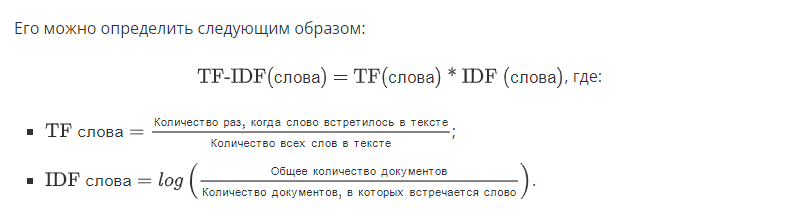

Этот показатель возрастает пропорционально количеству раз, когда слово встречается в тексте, и уменьшается пропорционально количеству слов во всех текстах в целом.

Таким образом:

коэффициент будет выше, если слово характерно именно для этого текста, то есть встречается в этом тексте часто, но не встречается в других текстах;
коэффициент будет ниже, если слово не встречается почти нигде или встречается одинаковое количество раз во всех текстах, то есть не характеризует никакой текст в отдельности.
Если вам интересно подробнее изучить алгоритм создания такого представления, рекомендуем прочитать статью.

Чтобы преобразовать текст по этому принципу, нам понадобится соответствующая функция из библиотеки sklearn — импортируем её:

https://medium.com/analytics-vidhya/tf-idf-term-frequency-technique-easiest-explanation-for-text-classification-in-nlp-with-code-8ca3912e58c3

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

In [4]:
df=pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


Далее учтём стоп-слова, то есть предлоги и другие служебные части речи, которые не несут содержательной информации, и определим нашу модель:

In [5]:
model = TfidfVectorizer(stop_words='english')

In [6]:
df['description'] = df['description'].fillna('')

Трансформируем наши описания в матрицу:

In [7]:
feature_matrix = model.fit_transform(df['description'])

In [10]:
feature_matrix.shape

(7787, 17905)

Теперь необходимо вычислить косинусную близость. Можно сделать это так:

In [11]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(feature_matrix, feature_matrix)

Обратите внимание! Мы используем здесь linear_kernel(), а не cosine_similarity(), так как в косинусном расстоянии в знаменателе реализуется нормировка векторов, а TF-IDF создаёт уже нормализованные векторы.

Вернём индексацию и уберём дубликаты из данных:

In [12]:
indices = pd.Series(df.index,index=df['title']).drop_duplicates()

In [16]:
indices

title
3%                                            0
7:19                                          1
23:59                                         2
9                                             3
21                                            4
                                           ... 
Zozo                                       7782
Zubaan                                     7783
Zulu Man in Japan                          7784
Zumbo's Just Desserts                      7785
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS    7786
Length: 7787, dtype: int64

Теперь пропишем функцию для создания рекомендаций:

In [18]:
indices["Star Trek"]

5785

In [22]:
scores=list(enumerate(cosine_sim[5785]))[:10]
scores

[(0, 0.05457986041187722),
 (1, 0.0),
 (2, 0.0),
 (3, 0.0),
 (4, 0.0),
 (5, 0.0),
 (6, 0.0),
 (7, 0.013649620910748544),
 (8, 0.0),
 (9, 0.0)]

In [24]:
 scores = sorted(scores, key=lambda x: x[1], reverse=True)
 scores

[(0, 0.05457986041187722),
 (7, 0.013649620910748544),
 (1, 0.0),
 (2, 0.0),
 (3, 0.0),
 (4, 0.0),
 (5, 0.0),
 (6, 0.0),
 (8, 0.0),
 (9, 0.0)]

In [25]:
[i[0] for i in scores]

[0, 7, 1, 2, 3, 4, 5, 6, 8, 9]

In [14]:
def get_recommendations(title):
    idx = indices[title]
    #вычисляем попарные коэффициенты косинусной близости
    scores = list(enumerate(cosine_sim[idx]))
    #сортируем фильмы на основании коэффициентов косинусной близости по убыванию
    scores = sorted(scores, key=lambda x: x[1], reverse=True)
    #выбираем десять наибольших значений косинусной близости; нулевую не берём, так как это тот же фильм
    scores =   scores[1:11]
    #забираем индексы
    ind_movie = [i[0] for i in scores]
    #возвращаем названия по индексам
    return df['title'].iloc[ind_movie]

Например, если мы хотим найти рекомендации по фильму Star Trek, то функция будет выдавать следующий результат:

In [15]:
get_recommendations("Star Trek")

5788             Star Trek: The Next Generation
5787                      Star Trek: Enterprise
5786                 Star Trek: Deep Space Nine
5557                     She's Out of My League
134                                  7 Days Out
6664                        The Midnight Gospel
6023                                     Teresa
4863    Pinkfong & Baby Shark's Space Adventure
5104                                       Rats
5970                             Tales by Light
Name: title, dtype: object

Найдите вторую рекомендацию для детского фильма Balto, вышедшего на экраны в 1995 году:

In [26]:
get_recommendations('Balto')


709                Balto 2: Wolf Quest
7446                           Vroomiz
1338    Chilling Adventures of Sabrina
7388                          Vampires
1770                          Dinotrux
2767                     Hold the Dark
5540                 Shanghai Fortress
4041                             Mercy
2582                       Half & Half
1365        Christmas in the Heartland
Name: title, dtype: object

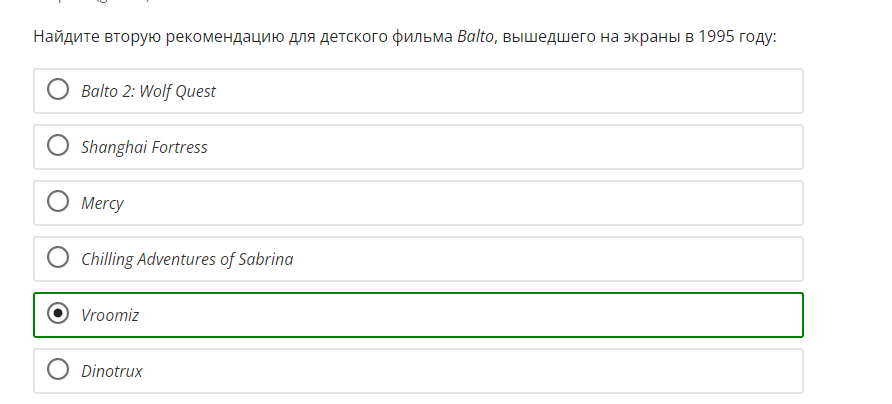

Итак, мы смогли создать рекомендации на основе контента и разобрались с принципом работы этого алгоритма. Теперь давайте посмотрим на преимущества и недостатки этого подхода.

Для создания рекомендаций не требуются данные от других пользователей. Как только пользователь выполнил поиск, просмотрел несколько продуктов и/или совершил несколько покупок, система фильтрации на основе контента может начать создавать соответствующие рекомендации. Это делает её идеальной для компаний и сервисов, у которых нет огромного количества пользователей для формирования выборки.


Рекомендации получаются очень релевантными для пользователя. Рекомендации на основе контента могут быть в значительной степени адаптированы к интересам пользователя, включая рекомендации по нишевым товарам, поскольку метод основан на сопоставлении характеристик или атрибутов объекта базы данных с интересами пользователя.


Рекомендации прозрачны для пользователя. Высокорелевантные рекомендации создают ощущение понятности алгоритмов для пользователя, повышая уровень его доверия к предлагаемым рекомендациям.


Вы избегаете проблемы «холодного старта». Хотя фильтрация на основе контента требует первоначального ввода данных от пользователей, чтобы начать давать рекомендации, качество ранних рекомендаций обычно намного выше, чем у других подходов.


Системы фильтрации на основе содержания обычно проще в создании. Основная работа заключается в создании характеристик, на основании которых будет вычисляться близость.

Отсутствие новизны и разнообразия. Вполне возможно, что человеку, который любит боевики, могли бы понравиться и фильмы ужасов. Однако мы не сможем ему их порекомендовать, если он сам не отметит подобные фильмы как понравившиеся.

Присвоенные характеристики могут быть неверными. Рекомендации на основе контента хороши настолько, насколько хороши атрибуты (характеристики), присвоенные продуктам.

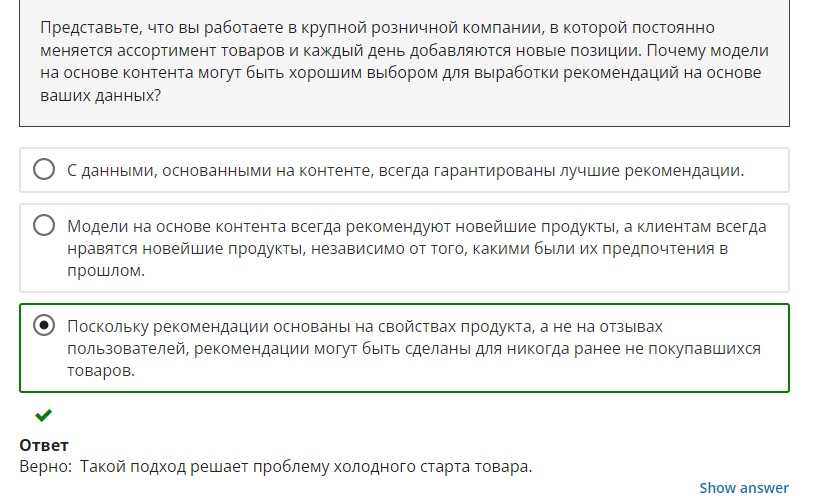

Итак, мы разобрались с первым персонализированным методом для построения рекомендательных систем. В следующих юнитах мы детально изучим другие алгоритмы.